# Essential Concepts

## Digital Image as 2D Signals and Binary Data

It explains that signals are functions conveying information about physical systems or phenomena and can be represented in different ways. Digital images are a subset of signals, specifically those where both time and amplitude are discrete. The book discusses one-dimensional signals, two-dimensional signals (images), three-dimensional signals (video), and multidimensional signals, highlighting their importance in different fields and applications. It emphasizes the role of signal processing, including digital image processing, in extracting information and transforming signals for human interpretation and analysis. In computers, digital images are typically encoded and stored as a collection of binary values that represent the color or intensity of each pixel in the image.

In [1]:
with open('data/external/palabok.jpg', 'rb') as file:
    image_binary_data = file.read()

print(f"{image_binary_data[:24]}...")

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cX'...


However, accessing and interpreting the binary data of an image file using these functions requires a deep understanding of the file format's structure and specifications. This is why we commonly use dedicated libraries like **PIL** for image processing and **OpenCV** for computer vision. Both handles image file parsing and provides a higher-level interface for retrieving image attributes.

## Digital Image Processing

Digital image processing refers to the manipulation and analysis of digital images using computer algorithms and techniques. We will use the following libraries:

* [Python Imaging Library](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html) for image processing
* [OpenCV](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html) for computer vision techniques
* [Numpy](https://numpy.org/devdocs/user/index.html) for numerical operations
* [Matplotlib](https://matplotlib.org/) for displaying images and transformations

In [2]:
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Loading Images and Retrieving Attributes

In [3]:
noodles = Image.open('data/external/palabok.jpg')

print(f"Filename: {noodles.filename}")
print(f"Dimensions: {noodles.width} x {noodles.height} or {noodles.size}")
print(f"File Format: {noodles.format}")
print(f"Color Mode and Bands: {noodles.mode} contains {noodles.getbands()} bands")
print(f"Metadata: {str(noodles.info)[:220]}...")

Filename: data/external/palabok.jpg
Dimensions: 4000 x 6000 or (4000, 6000)
File Format: JPEG
Color Mode and Bands: RGB contains ('R', 'G', 'B') bands
Metadata: {'jfif': 257, 'jfif_version': (1, 1), 'dpi': (72, 72), 'jfif_unit': 1, 'jfif_density': (72, 72), 'progressive': 1, 'progression': 1, 'icc_profile': b'\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x0...


### Image Sampling: Downsizing and Cropping

Image sampling involves selecting a subset of data points to represent an image at a lower resolution, useful for size reduction and computational efficiency. However, it may result in loss of fine details and image quality degradation. In the given code, the image was resampled and cropped to emphasize a specific region, aiding in the extraction of desired parts of the image.

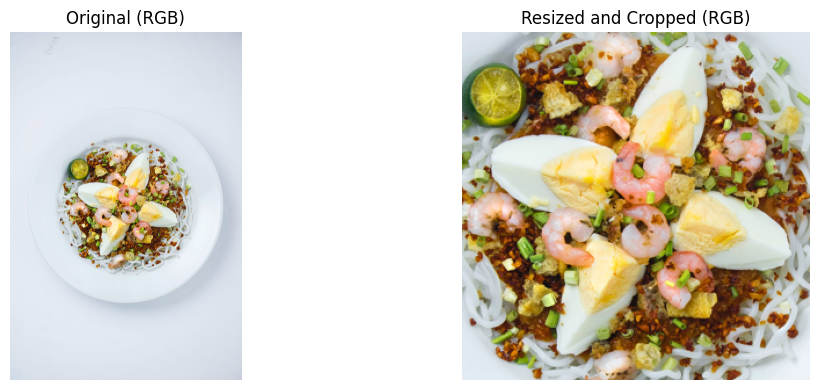

In [4]:
noodles_resized = noodles.resize((int(noodles.width * 0.15), int(noodles.height * 0.15)))
crop_width, crop_height = 300, 300 
crop_x = (noodles_resized.width - crop_width) // 2
crop_y = (noodles_resized.height - crop_height) // 2
crop_box = (crop_x, crop_y, crop_x + crop_width, crop_y + crop_height)
noodles_cropped = noodles_resized.crop(crop_box)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Original (RGB)')
axes[0].imshow(noodles)
axes[1].set_title('Resized and Cropped (RGB)')
axes[1].imshow(noodles_cropped)

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Image Rotation

Image rotation involves changing the orientation of an image and is achieved using a mathematical operation called a rotation matrix. 

$$ R_{\theta} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix} $$

Given an original point with coordinates (x, y), the new coordinates (x', y') after rotation can be calculated as follows:

$$ x' = x \cdot \cos(\theta) - y \cdot \sin(\theta) $$
$$ y' = x \cdot \sin(\theta) + y \cdot \cos(\theta) $$

When we rotate an image using the rotation matrix, we are essentially rearranging the positions of the pixels in the image, but the RGB values of the pixels themselves remain unchanged. The rotation matrix operations only affect the spatial coordinates of the pixels, not their color values.


In [5]:
def rotate_image(image, angle):
    image_array = np.array(image)
    center_x = image_array.shape[1] / 2
    center_y = image_array.shape[0] / 2
    theta = np.deg2rad(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    rotated_image = np.zeros_like(image_array)
    for y in range(image_array.shape[0]):
        for x in range(image_array.shape[1]):
            x_rel = x - center_x
            y_rel = y - center_y
            x_rot = rotation_matrix[0, 0] * x_rel + rotation_matrix[0, 1] * y_rel
            y_rot = rotation_matrix[1, 0] * x_rel + rotation_matrix[1, 1] * y_rel
            x_rot_adj = x_rot + center_x
            y_rot_adj = y_rot + center_y
            x_rot_adj_int = int(round(x_rot_adj))
            y_rot_adj_int = int(round(y_rot_adj))
            if 0 <= x_rot_adj_int < image_array.shape[1] and 0 <= y_rot_adj_int < image_array.shape[0]:
                rotated_image[y_rot_adj_int, x_rot_adj_int] = image_array[y, x]
    rotated_image = Image.fromarray(rotated_image)
    return rotated_image

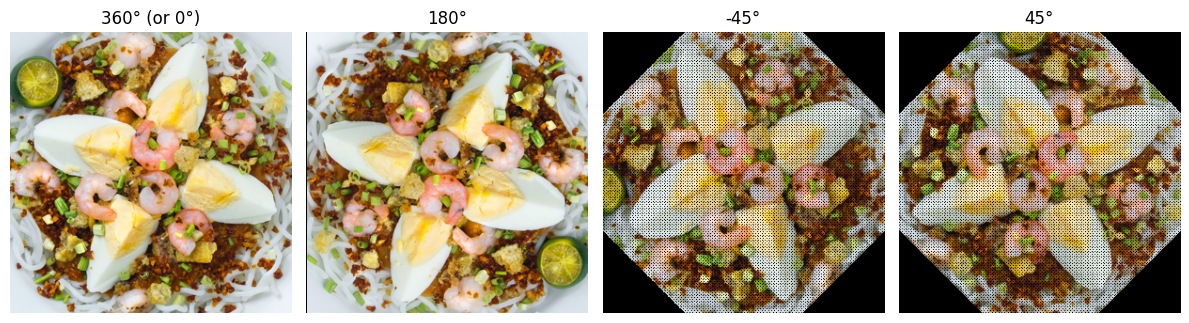

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].set_title('360° (or 0°)')
axes[0].imshow(rotate_image(noodles_cropped, 360))
axes[1].set_title('180°')
axes[1].imshow(rotate_image(noodles_cropped, 180))
axes[2].set_title('-45°')
axes[2].imshow(rotate_image(noodles_cropped, -45))
axes[3].set_title('45°')
axes[3].imshow(rotate_image(noodles_cropped, 45))

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

Alternatively, using PIL is more efficient.

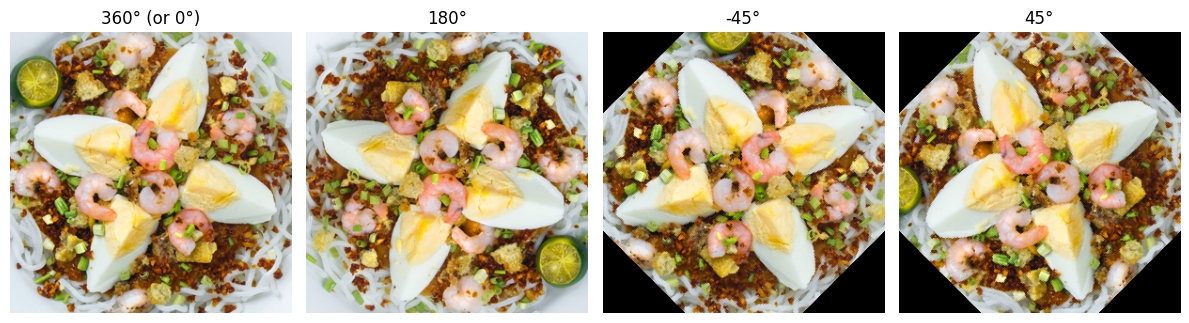

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].set_title('360° (or 0°)')
axes[0].imshow(noodles_cropped.rotate(360))
axes[1].set_title('180°')
axes[1].imshow(noodles_cropped.rotate(180))
axes[2].set_title('-45°')
axes[2].imshow(noodles_cropped.rotate(-45))
axes[3].set_title('45°')
axes[3].imshow(noodles_cropped.rotate(45))

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

## Color Depth and Representation

Color depth, also known as bit depth, refers to the number of bits used to represent the color of each pixel in an image. It determines the range and accuracy of colors that can be displayed. Higher color depth allows for a greater variety of colors and more precise color representation, while lower color depth can lead to color banding and loss of detail.

The choice of color mode depends on the specific image processing task and the desired color representation. Here are common color modes used for image analysis:

* `RGB` mode represents colors using combinations of red, green, and blue channels. It is widely used in electronic devices and displays for true color representation.
* `Black and White (1)` mode uses only two colors, black and white, and is suitable for binary images or cases where color information is not needed.
* `Grayscale (L)` mode represents the image using shades of gray. It is commonly used when color information is unnecessary or when working with grayscale images.
* `Palette (P)` mode uses a color palette to define the color for each pixel. It reduces memory size by using a limited set of colors and is useful for specific applications.
* `LAB` mode represents colors based on human perception, with channels for lightness (L), green-red color component (A), and blue-yellow color component (B). It is often used for color manipulation and analysis.
* `HSV` mode represents colors based on hue, saturation, and value. It is useful for color-based image analysis and processing.

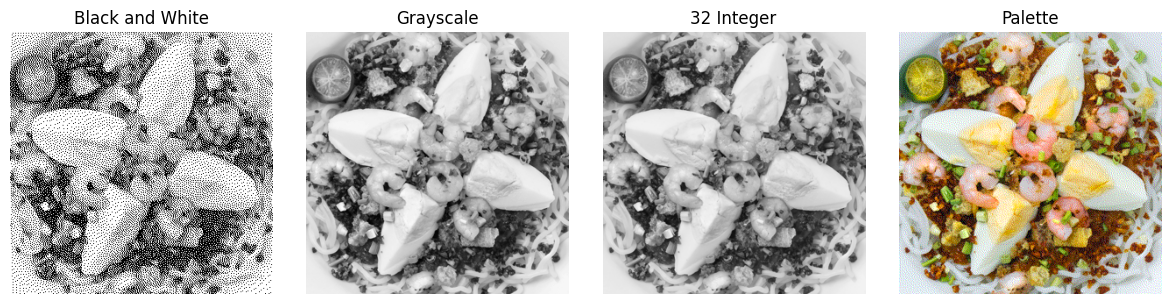

In [8]:
noodles_bw = noodles_cropped.convert('1')
noodles_g = noodles_cropped.convert('L')
noodles_p = noodles_cropped.convert('P')
noodles_i = noodles_cropped.convert('I')

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].set_title('Black and White')
axes[0].imshow(noodles_bw, cmap='binary')
axes[1].set_title('Grayscale')
axes[1].imshow(noodles_g, cmap='gray')
axes[2].set_title('32 Integer')
axes[2].imshow(noodles_i)
axes[3].set_title('Palette')
axes[3].imshow(noodles_p)

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

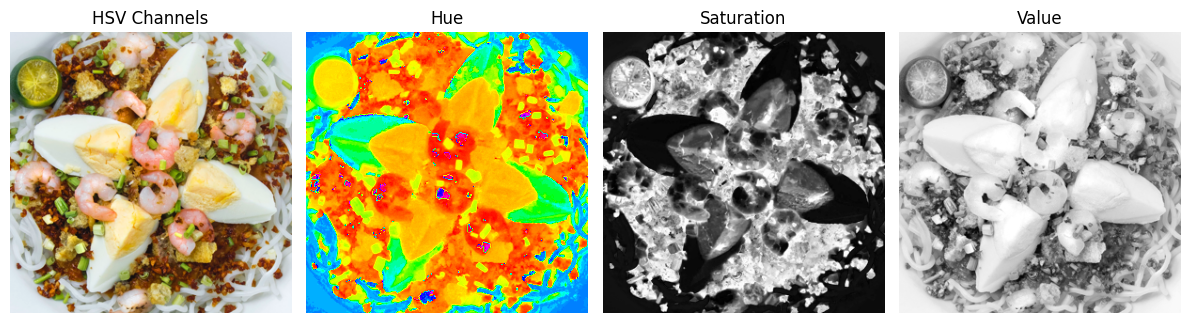

In [9]:
noodles_hsv = noodles_cropped.convert('HSV')
h, s, v = noodles_hsv.split()
zeros = np.zeros_like(h)
noodles_hsv_channels = Image.merge('HSV', (h, s, v))

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].set_title('HSV Channels')
axes[0].imshow(noodles_hsv_channels)
axes[1].set_title('Hue')
axes[1].imshow(h, cmap='hsv')
axes[2].set_title('Saturation')
axes[2].imshow(s, cmap='gray')
axes[3].set_title('Value')
axes[3].imshow(v, cmap='gray')

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

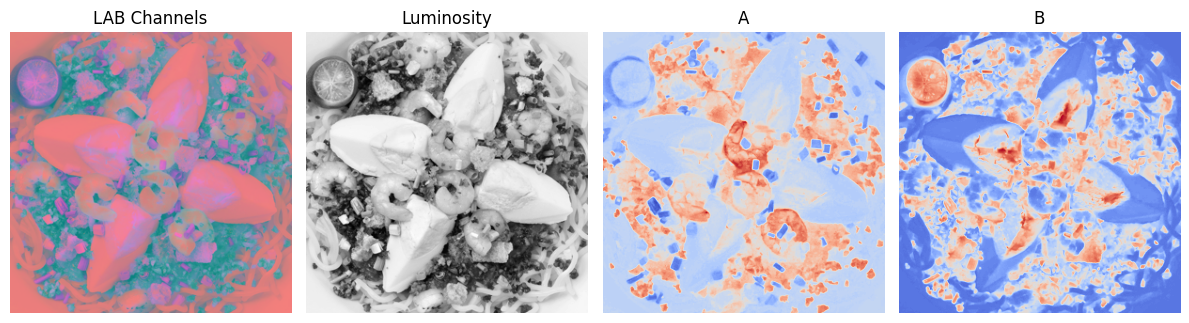

In [10]:
noodles_lab = noodles_cropped.convert('LAB')
noodles_l, noodles_a, noodles_b = noodles_lab.split()
noodles_lab2rgb = Image.merge('RGB', (noodles_l, noodles_a, noodles_b))

fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].set_title('LAB Channels')
axes[0].imshow(noodles_lab2rgb)
axes[1].set_title('Luminosity')
axes[1].imshow(noodles_l, cmap='gray')
axes[2].set_title('A')
axes[2].imshow(noodles_a, cmap='coolwarm')
axes[3].set_title('B')
axes[3].imshow(noodles_b, cmap='coolwarm')

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

Other use cases - simulating color deficiency.

* Reference for [Color Deficiency Matrix](http://mkweb.bcgsc.ca/colorblind/math.mhtml#protanomaly-deuteranomaly-and-tritanomaly)

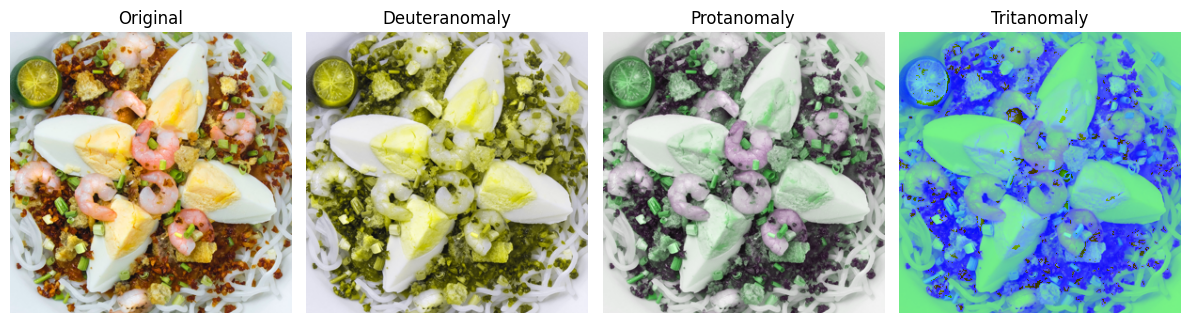

In [11]:
def simulate_deuteranomaly(rgb_color, deficiency_factor):
    """
    Weak Green
    """
    r, g, b = rgb_color
    modified_r = deficiency_factor * r + (1 - deficiency_factor) * g
    modified_g = (1 - deficiency_factor) * r + deficiency_factor * g
    return modified_r, modified_g, b

def simulate_protanomaly(rgb_color, deficiency_factor):
    r, g, b = rgb_color
    modified_r = deficiency_factor * r + (1 - deficiency_factor) * b
    modified_b = (1 - deficiency_factor) * r + deficiency_factor * b
    return modified_r, g, modified_b

def simulate_tritanomaly(rgb_color, deficiency_factor):
    r, g, b = rgb_color
    modified_r = (1 - deficiency_factor) * r + deficiency_factor * (1 - r)
    modified_g = deficiency_factor * g + (1 - deficiency_factor) * g
    modified_b = deficiency_factor * b + (1 - deficiency_factor) * (1 - b)
    return modified_r, modified_g, modified_b

def simulate_color_deficiency_image(image_array, deficiency_factor, deficiency_type):
    modified_image = np.zeros_like(image_array)
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            rgb_color = image_array[i, j]
            if deficiency_type == 'protanomaly':
                modified_color = simulate_protanomaly(rgb_color, deficiency_factor)
            elif deficiency_type == 'deuteranomaly':
                modified_color = simulate_deuteranomaly(rgb_color, deficiency_factor)
            elif deficiency_type == 'tritanomaly':
                modified_color = simulate_tritanomaly(rgb_color, deficiency_factor)
            else:
                modified_color = rgb_color
            modified_image[i, j] = modified_color
    return modified_image

noodles_rgb = np.array(noodles_cropped)
noodles_deu = simulate_color_deficiency_image(noodles_rgb, 0.5, 'deuteranomaly')
noodles_pro = simulate_color_deficiency_image(noodles_rgb, 0.5, 'protanomaly')
noodles_tri = simulate_color_deficiency_image(noodles_rgb, 0.25, 'tritanomaly')

fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].set_title('Original')
axes[0].imshow(noodles_rgb)
axes[1].set_title('Deuteranomaly')
axes[1].imshow(noodles_deu)
axes[2].set_title('Protanomaly')
axes[2].imshow(noodles_pro)
axes[3].set_title('Tritanomaly')
axes[3].imshow(noodles_tri)

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

Other Common Color Representations:

* `RGBA` represents colors red, green, blue and alpha for transparency.
* `CMYK` represents colors using four channels: Cyan, Magenta, Yellow, and Key (Black). It is commonly used printing to accurately reproduce colors.
* `Pantone` represents industry colors. It is commonly used for brand marketing.
* `32-bit Signed Integer Pixels (I)` mode represents each pixel as a 32-bit signed integer value. It is used when precise numerical calculations or manipulations on pixel values are required.
* `32-bit Floating Point Pixels (F)` mode represents each pixel as a 32-bit floating-point value. It is used when high precision and dynamic range are needed in image processing operations.

## Image Brightness, Contrast, Saturation

In RGB space, this is how image manipulation works.

1. Brightness: $ pixel' = (k \cdot pixel_{R}, k \cdot pixel_{G}, k \cdot pixel_{B}) $
2. Contrast Adjustment:
    * To increase the contrast, we multiply the difference between each RGB value and the average of the RGB values by a factor
    * (avg + 1.5 * (R - avg), avg + 1.5 * (G - avg), avg + 1.5 * (B - avg)), where avg = (R + G + B) / 3
3. Saturation:
    * [Convert RGB space to HSL](https://www.calculatorology.com/rgb-to-hsl-conversion/)
    * Multiply the Saturation channel by factor
    * [Convert RGB space to HSL](https://www.calculatorology.com/hsl-to-rgb-conversion/)


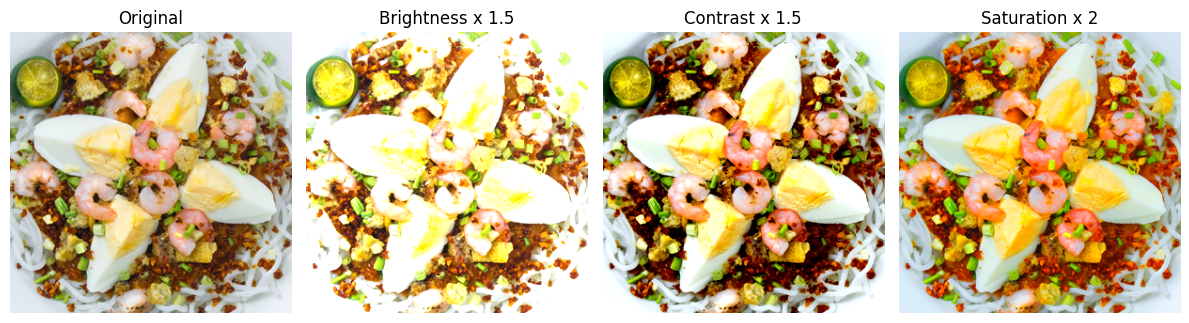

In [12]:
bright_image = ImageEnhance.Brightness(noodles_cropped).enhance(1.5)
contrast_image = ImageEnhance.Contrast(noodles_cropped).enhance(1.5)
saturated_image = ImageEnhance.Color(noodles_cropped).enhance(2)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].set_title('Original')
axes[0].imshow(noodles_cropped)
axes[1].set_title('Brightness x 1.5')
axes[1].imshow(bright_image)
axes[2].set_title('Contrast x 1.5')
axes[2].imshow(contrast_image)
axes[3].set_title('Saturation x 2')
axes[3].imshow(saturated_image)

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

## Image Manipulation: Blur

Gaussian blur applies a convolution operation using a Gaussian kernel. It assigns weights to neighboring pixels based on a Gaussian distribution, resulting in a smoothing effect while preserving overall image structure.

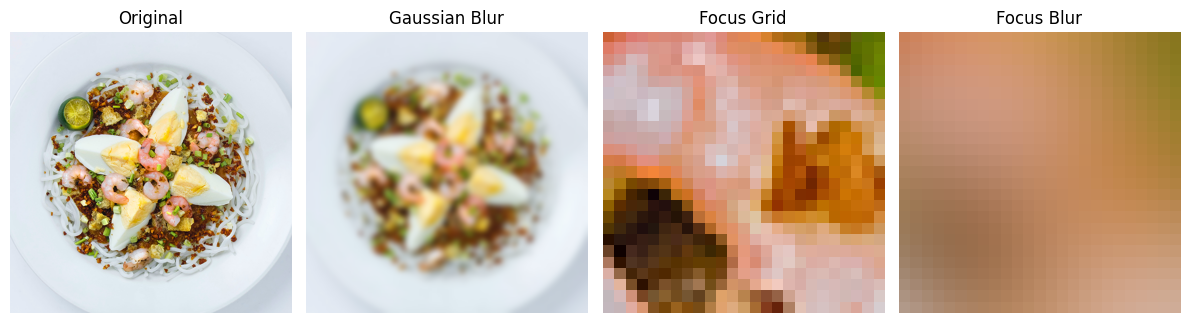

In [20]:
noodles_rgb = Image.open("data/processed/palabok.png")
blurred_image = noodles_rgb.filter(ImageFilter.GaussianBlur(radius=5))

noodles_array = np.array(noodles_rgb)
blurred_array = np.array(blurred_image)

grid_start_x = 250
grid_start_y = 250
grid_size = 25
grid_noodles = noodles_array[grid_start_y:grid_start_y+grid_size, grid_start_x:grid_start_x+grid_size]
grid_blurred = blurred_array[grid_start_y:grid_start_y+grid_size, grid_start_x:grid_start_x+grid_size]

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].set_title('Original')
axes[0].imshow(noodles_rgb)
axes[1].set_title('Gaussian Blur')
axes[1].imshow(blurred_image)
axes[2].set_title('Focus Grid')
axes[2].imshow(grid_noodles)
axes[3].set_title('Focus Blur')
axes[3].imshow(grid_blurred)

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

In [23]:
from scipy.ndimage import gaussian_filter

sigma = 1.0 
size = 5 

kernel = np.fromfunction(lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2) / (2 * sigma**2)), (size, size))
kernel = kernel / np.sum(kernel)
print(kernel)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


Sharpening works by enhancing the high-frequency components of an image, increasing contrast along edges and details, typically achieved by subtracting a blurred version of the image from the original. The "sharpening filter" typically consists of the central pixel with negative values and positive values in its immediate neighborhood, producing a high-pass filter effect

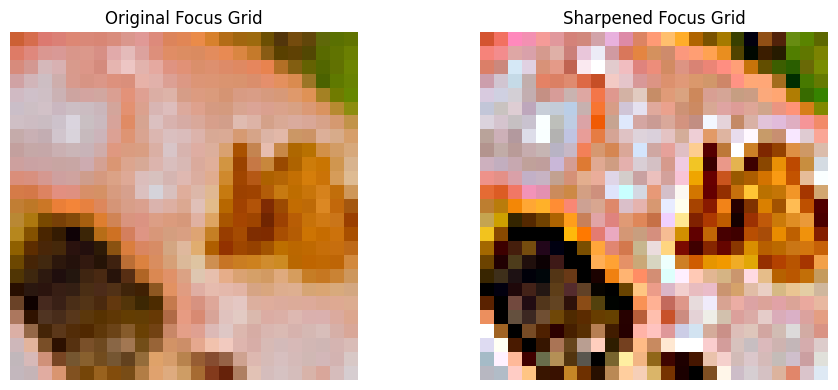

In [27]:
enhancer = ImageEnhance.Sharpness(noodles_rgb)
sharpened_image = enhancer.enhance(5.0)

grid_start_x = 250
grid_start_y = 250
grid_size = 25
grid_noodles = noodles_rgb.crop((grid_start_x, grid_start_y, grid_start_x + grid_size, grid_start_y + grid_size))
grid_sharpened = sharpened_image.crop((grid_start_x, grid_start_y, grid_start_x + grid_size, grid_start_y + grid_size))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].set_title('Original Focus Grid')
axes[0].imshow(grid_noodles)
axes[1].set_title('Sharpened Focus Grid')
axes[1].imshow(grid_sharpened)

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()